In [1]:
import cv2
import numpy as np

In [97]:
img = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Frequency filtering techniques\testimg.jpeg", cv2.IMREAD_GRAYSCALE)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

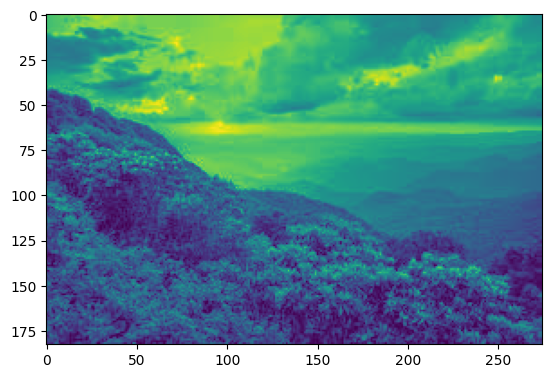

In [98]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

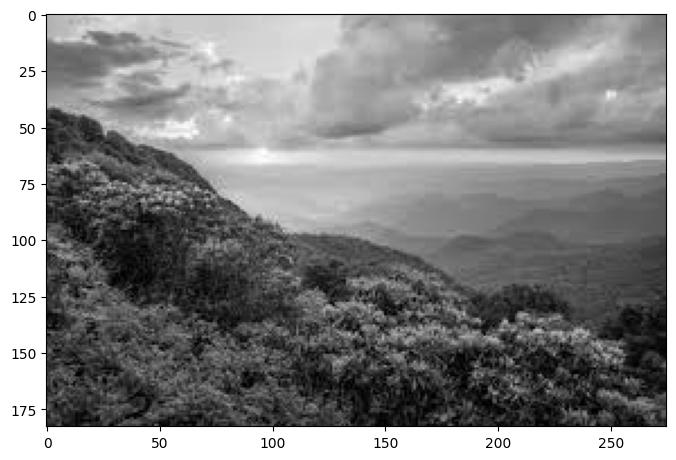

In [99]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(grey_img)
plt.show()

In [100]:
# cut-off frequency
rows, cols = grey_img.shape[0:2]
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
# print(mask)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# print(mask)

In [101]:
grey_img.shape

(183, 275, 3)

In [102]:
grey_img = cv2.cvtColor(grey_img, cv2.COLOR_RGB2GRAY)

In [103]:
# Fourier transform

image = np.float32(grey_img)
dft = cv2.dft(np.float32(image), cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [104]:
grey_img.shape

(183, 275)

In [105]:
filtered_dft = dft_shift * mask

In [106]:
dft_ishift = np.fft.ifftshift(filtered_dft)
img_back = np.fft.ifft2(dft_ishift)
img_back = np.abs(img_back)

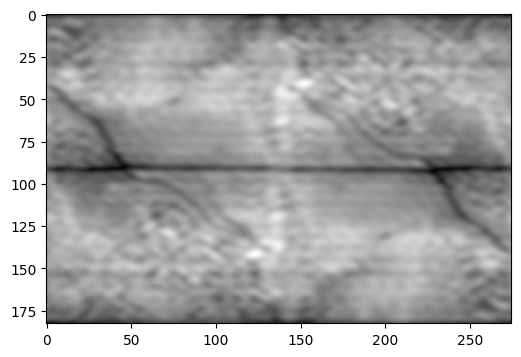

In [107]:
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
plt.figure(figsize=(6,6))
plt.imshow(img_back, cmap='gray')
plt.show()

In [108]:
# Low Pass Filter
def low_pass_filter(image, cutoff_freq):
    # Creating a mask
    rows, cols = image.shape[0:2]
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)

    # creating low-pass filter
    r,c = np.ogrid[:rows, :cols]
    mask_area = (r-crow)**2 + (c-ccol)**2 <= cutoff_freq**2
    mask[mask_area] = 1

    # Fourier transform
    image = np.float32(image)
    f = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f)

    # Applying the mask
    filtered_img = f_shift * mask

    # inverse fourier transform
    f_ishifted = np.fft.ifftshift(filtered_img)
    img_back = np.fft.ifft2(f_ishifted)
    img_back = np.abs(img_back)
    return img_back

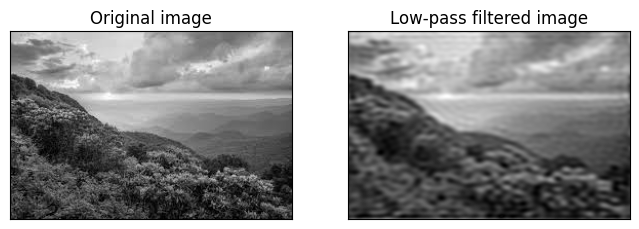

In [115]:
cutoff_freq = 30
filtered_image = low_pass_filter(grey_img, cutoff_freq=cutoff_freq)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(grey_img, cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.title("Low-pass filtered image")
plt.imshow(filtered_image, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [116]:
# Low Pass Filter
def high_pass_filter(image, cutoff_freq):
    # Creating a mask
    rows, cols = image.shape[0:2]
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)

    # creating low-pass filter
    r,c = np.ogrid[:rows, :cols]
    mask_area = (r-crow)**2 + (c-ccol)**2 <= cutoff_freq**2
    mask[mask_area] = 0

    # Fourier transform
    image = np.float32(image)
    f = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f)

    # Applying the mask
    filtered_img = f_shift * mask

    # inverse fourier transform
    f_ishifted = np.fft.ifftshift(filtered_img)
    img_back = np.fft.ifft2(f_ishifted)
    img_back = np.abs(img_back)
    return img_back

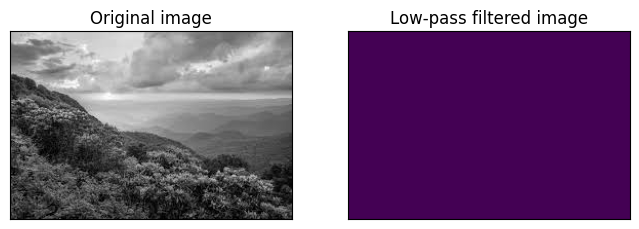

In [118]:
cutoff_freq = 30
high_filtered_image = high_pass_filter(grey_img, cutoff_freq=cutoff_freq)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(grey_img, cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.title("high-pass filtered image")
plt.imshow(high_filtered_image), plt.xticks([]), plt.yticks([])
plt.show()